# Анализ

In [ ]:
import ast
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [157]:

df = pd.read_csv("C:\\Users\\1\\Desktop\\proga\\ЛШ\\проект ЛШ\\filled_all_data.csv")

df['gender'] = df.apply(lambda x: x['gender_new'] if x['gender'] in ['male', 'female'] else x['gender'], axis=1)
df = df.drop(columns=['Unnamed: 0', 'id_hash', 'gender_new', 'head', 'content', 'date_of_find'])



# Преобразуем строки в списки (если age записан как "[1, 18]")
df['age'] = df['age'].apply(
    lambda x: ast.literal_eval(x) 
    if isinstance(x, str) and x.startswith('[') else x
)

# Далее explode() как выше
df = df.explode('age')
df['age'] = pd.to_numeric(df['age'], errors='coerce')


def split_date(r_date):
    if not pd.isna(r_date):
        try:
            year = int(r_date.split('-')[0])
            month = int(r_date.split('-')[1])
            day = int(r_date.split('-')[2].split()[0])
            hour = int(r_date.split('-')[2].split()[1].split(':')[0])
            return year, month, day, hour
        except Exception as e:
            print(e)


# Находим колонки с 'date' в названии
date_columns = [col for col in df.columns if 'date' in col.lower()]

# Применяем функцию к каждой колонке и создаем новые колонки
for col in date_columns:
    df[[f'{col}_year', f'{col}_month', f'{col}_day', f'{col}_hour']] = (
        df[col].apply(split_date).apply(pd.Series))

df['search_period'] = df.apply(lambda x: int(x['search_period'].split()[0]) if not pd.isna(x['search_period']) else x['search_period'], axis=1)


df = df.drop(columns=['date_search', 'date_of_loss', 'last_search_date', 'search_period'])
df

,gender,age,location,status,date_search_year,date_search_month,date_search_day,date_search_hour,date_of_loss_year,date_of_loss_month,date_of_loss_day,date_of_loss_hour,last_search_date_year,last_search_date_month,last_search_date_day,last_search_date_hour
0,мн,NaN,Мурманской области,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,муж,1.0,РФ Компасы,жив(а),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,муж,18.0,РФ Компасы,жив(а),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,неопр,5.0,Кабардино-Балкарской Республики Трек,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,неопр,18.0,Тункинском районе Республики Бурятия Учения Да...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19729,муж,1.0,Троицкий район,жив(а),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19730,мн,39.0,NaN,погиб(ла),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19731,жен,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19732,неопр,NaN,Барнаул,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
df['gender'] = df['gender'].fillna('неопр')
df['location'] = df['location'].fillna('неопр')

mean_age = df['age'].mean()
df['age'] = df['age'].fillna(mean_age)

df = df[df['status'].isin(['жив(а)', 'погиб(ла)'])]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9170 entries, 1 to 19730
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  9170 non-null   object 
 1   age                     9170 non-null   float64
 2   location                9170 non-null   object 
 3   status                  9170 non-null   object 
 4   date_search_year        1000 non-null   float64
 5   date_search_month       1000 non-null   float64
 6   date_search_day         1000 non-null   float64
 7   date_search_hour        1000 non-null   float64
 8   date_of_loss_year       1000 non-null   float64
 9   date_of_loss_month      1000 non-null   float64
 10  date_of_loss_day        1000 non-null   float64
 11  date_of_loss_hour       1000 non-null   float64
 12  last_search_date_year   348 non-null    float64
 13  last_search_date_month  348 non-null    float64
 14  last_search_date_day    348 non-null    floa

In [159]:
date_columns = [
    'date_search_year', 'date_search_month',
    'date_search_day', 'date_search_hour',
    'date_of_loss_year', 'date_of_loss_month',
    'date_of_loss_day', 'date_of_loss_hour',
    'last_search_date_year', 'last_search_date_month', 
    'last_search_date_day', 'last_search_date_hour'
]

# Заполняем пропуски медианными значениями
for col in date_columns:
    median_value = df[col].median()  # Вычисляем медиану для каждого столбца
    df[col] = df[col].fillna(median_value)  # Заменяем NaN на медиану

C:\Users\1\AppData\Local\Temp\ipykernel_11344\3524016044.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(median_value)  # Заменяем NaN на медиану


In [160]:
df

,gender,age,location,status,date_search_year,date_search_month,date_search_day,date_search_hour,date_of_loss_year,date_of_loss_month,date_of_loss_day,date_of_loss_hour,last_search_date_year,last_search_date_month,last_search_date_day,last_search_date_hour
1,муж,1.0,РФ Компасы,жив(а),2022.0,7.0,16.0,15.0,2022.0,7.0,16.0,15.0,2023.0,7.0,14.0,13.0
1,муж,18.0,РФ Компасы,жив(а),2022.0,7.0,16.0,15.0,2022.0,7.0,16.0,15.0,2023.0,7.0,14.0,13.0
25,муж,10.0,Волгоград,жив(а),2022.0,7.0,16.0,15.0,2022.0,7.0,16.0,15.0,2023.0,7.0,14.0,13.0
25,муж,11.0,Волгоград,жив(а),2022.0,7.0,16.0,15.0,2022.0,7.0,16.0,15.0,2023.0,7.0,14.0,13.0
26,мн,12.0,Киров Кировская обл,жив(а),2022.0,7.0,16.0,15.0,2022.0,7.0,16.0,15.0,2023.0,7.0,14.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19714,жен,50.0,Новостроек Костюшко Новостроек Маршала Захарова,жив(а),2022.0,7.0,16.0,15.0,2022.0,7.0,16.0,15.0,2023.0,7.0,14.0,13.0
19715,муж,22.0,Село Щетиновка Белгород,погиб(ла),2019.0,4.0,22.0,13.0,2019.0,4.0,21.0,13.0,2023.0,7.0,14.0,13.0
19729,муж,11.0,Троицкий район,жив(а),2022.0,7.0,16.0,15.0,2022.0,7.0,16.0,15.0,2023.0,7.0,14.0,13.0
19729,муж,1.0,Троицкий район,жив(а),2022.0,7.0,16.0,15.0,2022.0,7.0,16.0,15.0,2023.0,7.0,14.0,13.0


In [161]:
from sklearn.preprocessing import LabelEncoder

categorial_columns = ['gender', 'location', 'status']
categorical_features = df[categorial_columns]

# Create a LabelEncoder object
label_encoding = LabelEncoder()

# Fit and transform the categorical data
for column in categorical_features:
  df[column] = label_encoding.fit_transform(df[column])

C:\Users\1\AppData\Local\Temp\ipykernel_11344\3805391969.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoding.fit_transform(df[column])
C:\Users\1\AppData\Local\Temp\ipykernel_11344\3805391969.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoding.fit_transform(df[column])
C:\Users\1\AppData\Local\Temp\ipykernel_11344\3805391969.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

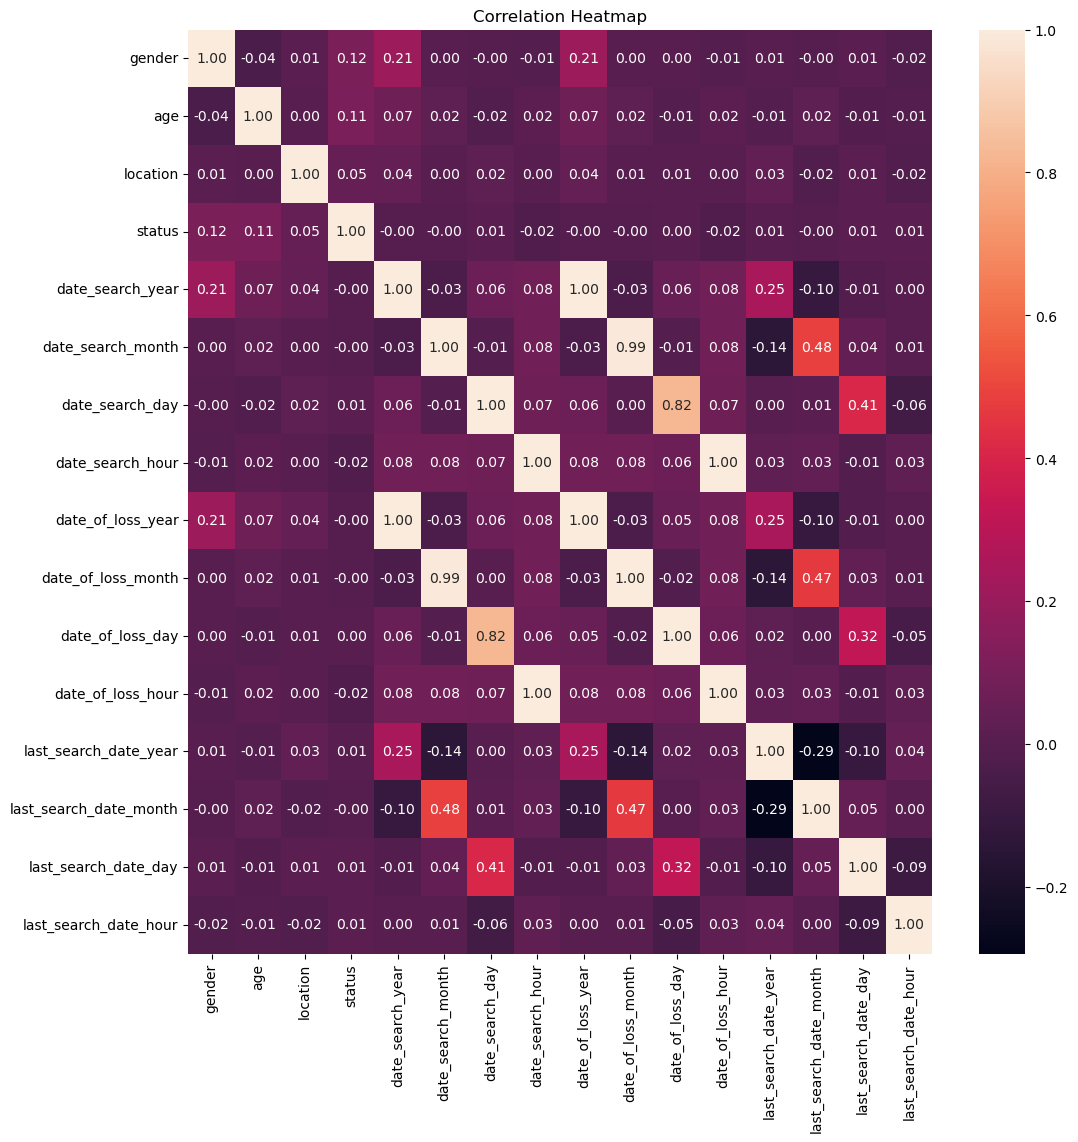

In [162]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 12)) # Adjust figure size for better readability
sns.heatmap(correlation_matrix,
            annot=True,      # Display correlation values on the heatmap
            fmt=".2f")       # Format annotations to two decimal places
plt.title('Correlation Heatmap')
plt.show()

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# отбираем по 2000 экземпляров для баланса классов
sampled_df = df.groupby('status').apply(lambda x: x.sample(2000, random_state=42)).reset_index(drop=True)

X = sampled_df.drop(columns=['status'])
y = sampled_df['status']

# делим на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True)

# масштабирауем данные
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('До масштабирования: ',X_train.mean(axis=0))
print('После масштабирования: ',X_train_scaled.mean(axis=0))

До масштабирования:  gender                       1.417857
age                         48.781552
location                  1169.757143
date_search_year          2021.982500
date_search_month            6.981429
date_search_day             15.948929
date_search_hour            14.904286
date_of_loss_year         2021.982500
date_of_loss_month           6.978929
date_of_loss_day            15.925714
date_of_loss_hour           14.904286
last_search_date_year     2022.991071
last_search_date_month       7.000357
last_search_date_day        14.013214
last_search_date_hour       13.003571
dtype: float64
После масштабирования:  [0.47261905 0.51378013 0.48039308 0.69825    0.54376623 0.49829762
 0.64801242 0.69825    0.54353896 0.49752381 0.64801242 0.59821429
 0.54548701 0.43377381 0.56537267]


C:\Users\1\AppData\Local\Temp\ipykernel_11344\3025206101.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby('status').apply(lambda x: x.sample(2000, random_state=42)).reset_index(drop=True)


#  Логрег

In [169]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train, y_train)

# 5. Оценка модели
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.56      0.59       615
           1       0.58      0.65      0.61       585

    accuracy                           0.60      1200
   macro avg       0.60      0.60      0.60      1200
weighted avg       0.60      0.60      0.60      1200



c:\Users\1\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# KNN

In [176]:
from sklearn.neighbors import KNeighborsClassifier

# Шаг 1. создание модели
knn = KNeighborsClassifier(n_neighbors=5)

# Шаг 2. обучение модели
knn.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.57      0.60       615
           1       0.59      0.66      0.63       585

    accuracy                           0.61      1200
   macro avg       0.62      0.62      0.61      1200
weighted avg       0.62      0.61      0.61      1200



# ДесижнТри

In [192]:
from sklearn.tree import DecisionTreeClassifier

# Шаг 1. создание модели
decision_tree = DecisionTreeClassifier()

# Шаг 2. обучение модели
decision_tree.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.65      0.67       615
           1       0.66      0.71      0.68       585

    accuracy                           0.68      1200
   macro avg       0.68      0.68      0.68      1200
weighted avg       0.68      0.68      0.68      1200



# РэндомФорест

In [167]:
from sklearn.ensemble import RandomForestClassifier

# Шаг 1. создание модели
random_forest = RandomForestClassifier()

# Шаг 2. обучение модели
random_forest.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.66      0.70       615
           1       0.68      0.77      0.72       585

    accuracy                           0.71      1200
   macro avg       0.72      0.71      0.71      1200
weighted avg       0.72      0.71      0.71      1200

